# Домашнее задание №2
### Дисциплина: Современные методы анализа данных
### Тема: NumPy, Pandas, визуализация данных
### Автор: Ермакова Любовь
### Дата: 2025-08-23


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("seaborn-v0_8")
sns.set_theme(palette="pastel")

## 1. Загрузка данных и описание

Источник: Kaggle – Video Game Sales with Ratings (rush4ratio)
Файл: `Video_Games_Sales.csv`

**Описание ключевых переменных:** Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, Critic_Score, Critic_Count, User_Score, User_Count, Developer, Rating.


In [9]:
df = pd.read_csv("Video_Games_Sales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Первичный анализ данных

In [11]:
display(df.shape)
display(df.info())
display(df.describe(include="all"))

(16719, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


None

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


## 3. Предобработка данных
- Преобразуем `User_Score` в числовой тип (tbd → NaN)
- Заполним `Year_of_Release` модой
- Удалим строки без `Global_Sales`


In [15]:
df["User_Score"] = pd.to_numeric(df["User_Score"], errors="coerce")
df["Year_of_Release"] = df["Year_of_Release"].fillna(df["Year_of_Release"].mode()[0])
df.dropna(subset=["Global_Sales"], inplace=True)
display(df.isna().sum().sort_values(ascending=False).head(10))

User_Score      9129
User_Count      9129
Critic_Score    8582
Critic_Count    8582
Rating          6769
Developer       6623
Publisher         54
Name               2
Genre              2
Platform           0
dtype: int64

## 4. Анализ переменных
### 4.1 Числовые переменные

,Year_of_Release,Critic_Score,User_Score,Global_Sales
count,16719.000000,8137.000000,7590.000000,16719.000000
mean,2006.511693,68.967679,7.125046,0.533543
std,5.834610,13.938165,1.500006,1.547935
min,1980.000000,13.000000,0.000000,0.010000
25%,2003.000000,60.000000,6.400000,0.060000
50%,2008.000000,71.000000,7.500000,0.170000
75%,2010.000000,79.000000,8.200000,0.470000
max,2020.000000,98.000000,9.700000,82.530000


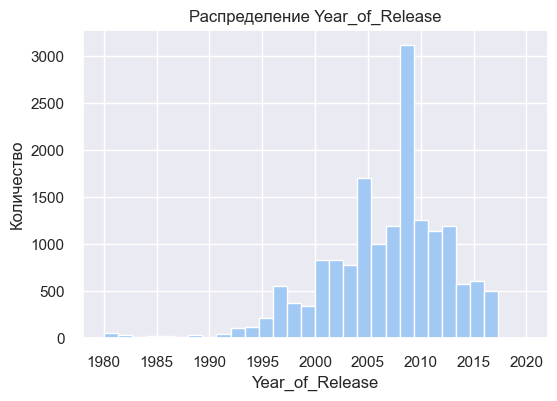

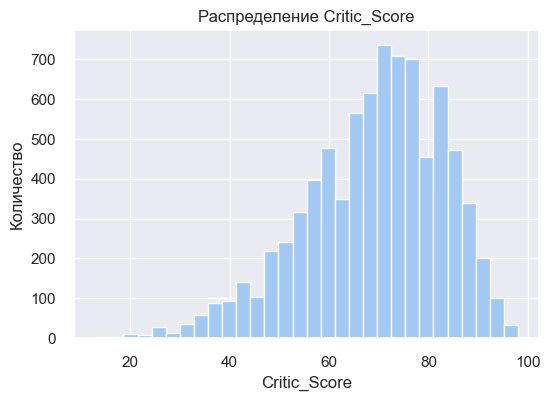

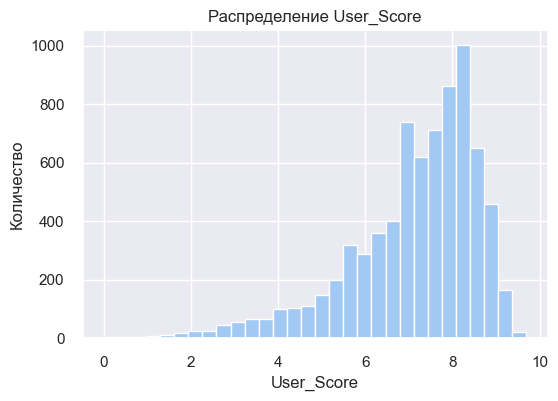

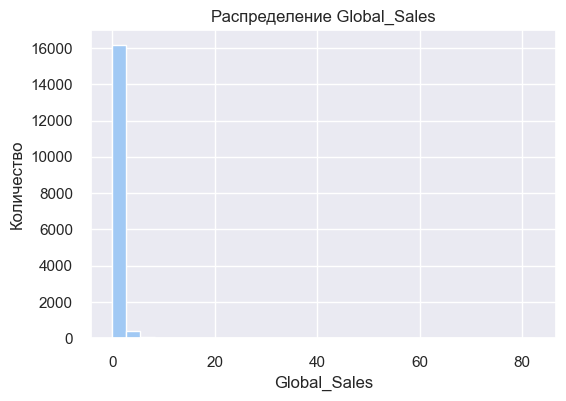

In [17]:
num_cols = ["Year_of_Release","Critic_Score","User_Score","Global_Sales"]
display(df[num_cols].describe())
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Распределение {col}")
    plt.xlabel(col)
    plt.ylabel("Количество")
    plt.show()

### 4.2 Категориальные переменные

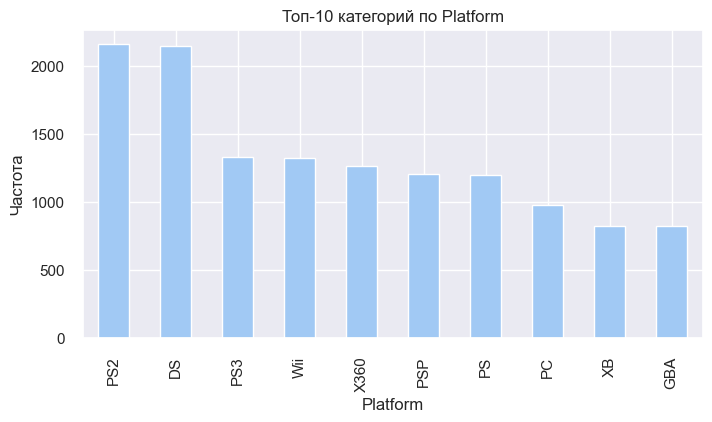

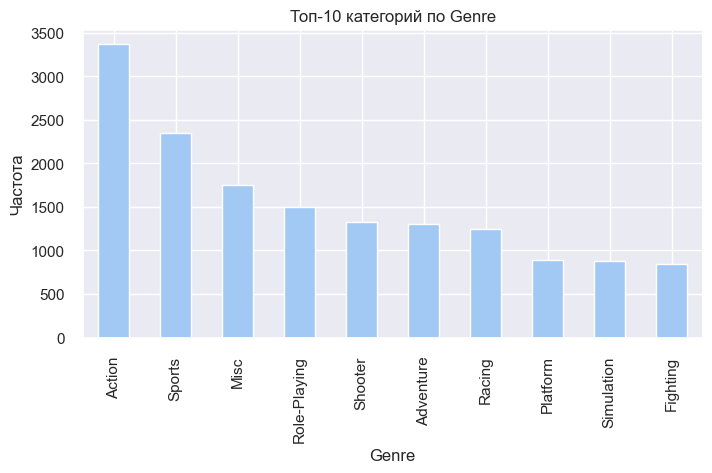

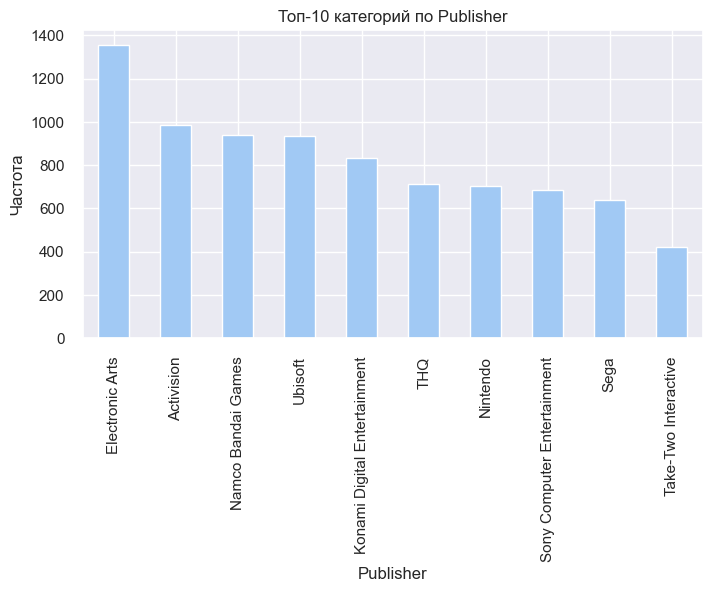

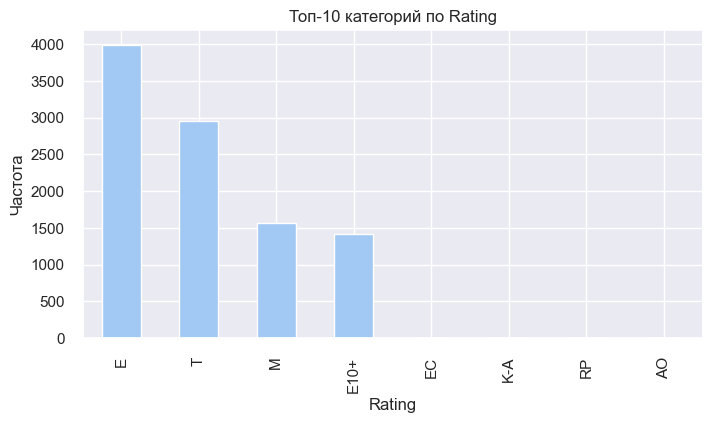

In [19]:
cat_cols = ["Platform","Genre","Publisher","Rating"]
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Топ-10 категорий по {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")
    plt.show()

## 5. Анализ взаимодействий
### 5.1 Числовая & числовая

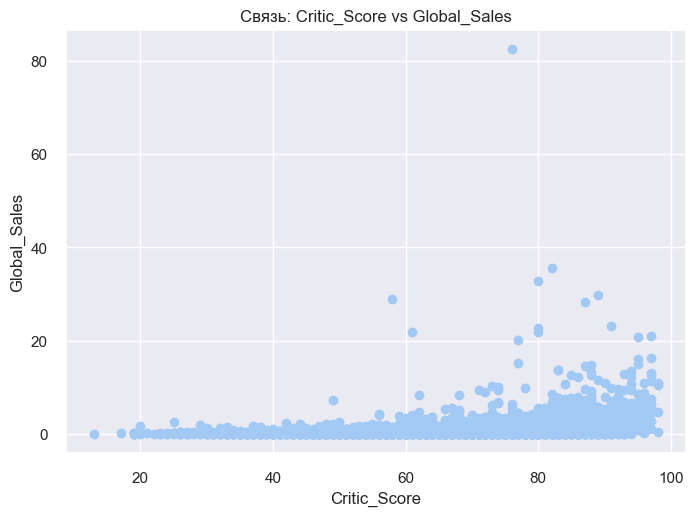

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.245471
Global_Sales,0.245471,1.000000


In [21]:
plt.figure()
plt.scatter(df["Critic_Score"], df["Global_Sales"])
plt.title("Связь: Critic_Score vs Global_Sales")
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
plt.show()
display(df[["Critic_Score","Global_Sales"]].corr())

### 5.2 Числовая & категориальная

<Figure size 1000x500 with 0 Axes>

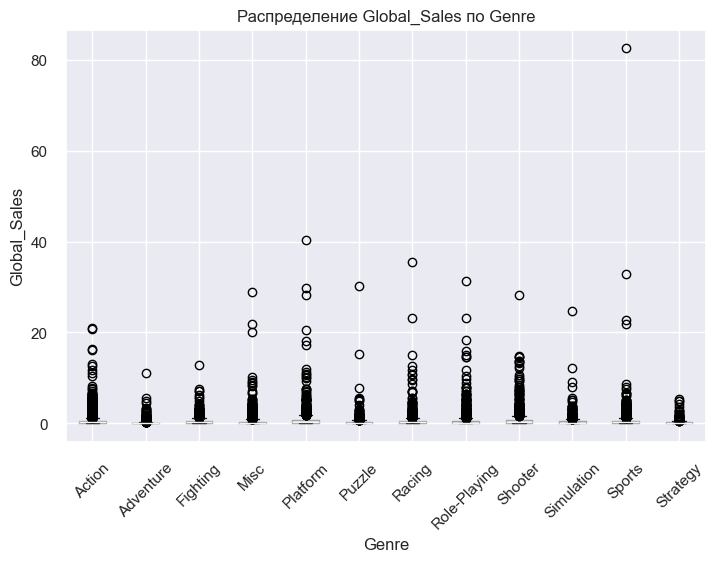

,mean,sum
Genre,,
Action,0.517884,1745.27
Sports,0.567291,1332.00
Shooter,0.795873,1052.94
Role-Playing,0.622933,934.40
Platform,0.932523,828.08
Misc,0.458960,803.18
Racing,0.583587,728.90
Fighting,0.527067,447.48
Simulation,0.446705,390.42


In [23]:
plt.figure(figsize=(10,5))
df.boxplot(column="Global_Sales", by="Genre", rot=45)
plt.title("Распределение Global_Sales по Genre")
plt.suptitle("")
plt.xlabel("Genre")
plt.ylabel("Global_Sales")
plt.show()
display(df.groupby("Genre")["Global_Sales"].agg(["mean","sum"]).sort_values("sum", ascending=False))

### 5.3 Категориальная & категориальная

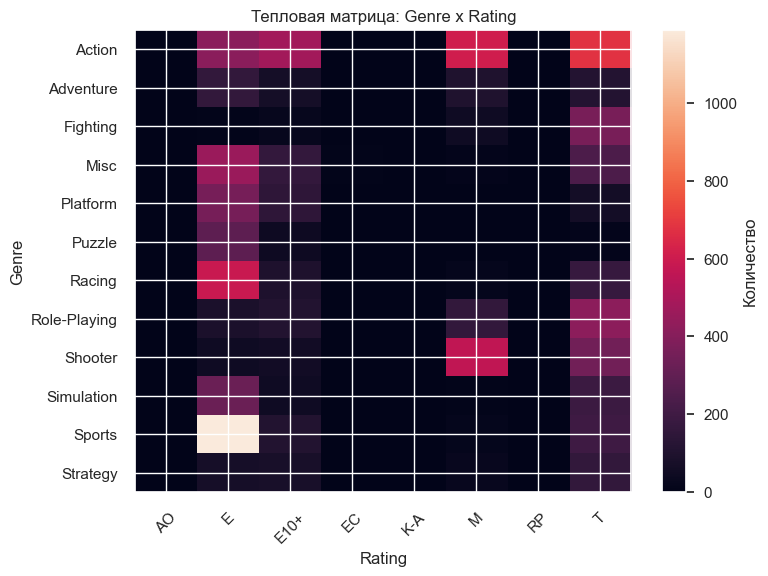

Rating,AO,E,E10+,EC,K-A,M,RP,T
Genre,,,,,,,,
Action,1,416,481,1,0,608,0,681
Adventure,0,162,68,2,0,99,0,115
Fighting,0,8,19,0,0,49,0,362
Misc,0,457,167,5,1,13,0,239
Platform,0,358,144,0,0,3,0,64
Puzzle,0,289,43,0,0,0,0,10
Racing,0,585,96,0,0,18,1,172
Role-Playing,0,84,111,0,0,162,0,420
Shooter,0,48,58,0,0,565,0,348


In [25]:
ct = pd.crosstab(df["Genre"], df["Rating"])
plt.figure(figsize=(8,6))
plt.imshow(ct, aspect="auto")
plt.title("Тепловая матрица: Genre x Rating")
plt.xlabel("Rating")
plt.ylabel("Genre")
plt.xticks(range(len(ct.columns)), ct.columns, rotation=45)
plt.yticks(range(len(ct.index)), ct.index)
plt.colorbar(label="Количество")
plt.show()
display(ct.head(10))

### 5.4 Временной ряд

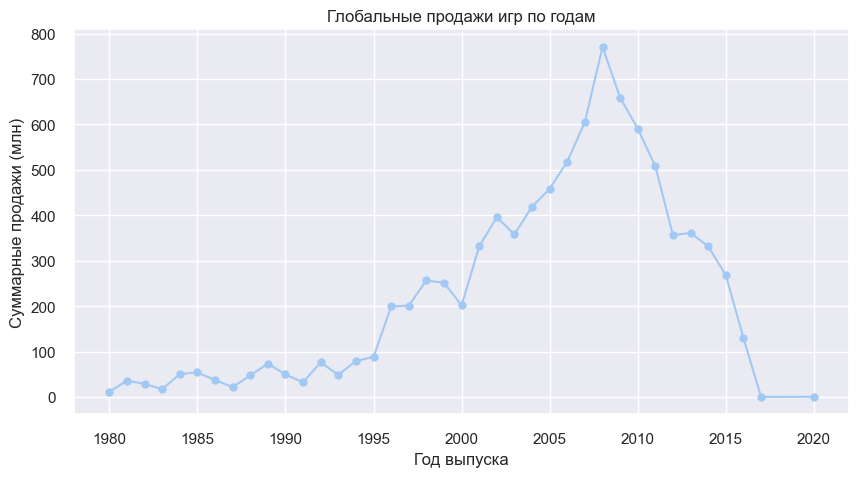

In [27]:
sales_by_year = df.groupby("Year_of_Release")["Global_Sales"].sum()
plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker="o")
plt.title("Глобальные продажи игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Суммарные продажи (млн)")
plt.show()

## 6. Группировки и агрегирование

In [29]:
display(
    df.groupby("Platform")["Global_Sales"].agg(["mean","sum"]).sort_values("sum", ascending=False).head(10)
)
display(
    df.groupby("Genre")["Critic_Score"].mean().sort_values(ascending=False)
)

,mean,sum
Platform,,
PS2,0.581046,1255.64
X360,0.769913,971.63
PS3,0.705808,939.43
Wii,0.687977,908.13
DS,0.375046,807.10
PS,0.610426,730.68
GBA,0.387470,318.50
PS4,0.799567,314.23
PSP,0.243424,294.30


Genre
Role-Playing    72.652646
Strategy        72.086093
Sports          71.968174
Shooter         70.181144
Fighting        69.217604
Simulation      68.619318
Platform        68.058350
Racing          67.963612
Puzzle          67.424107
Action          66.629101
Misc            66.619503
Adventure       65.331269
Name: Critic_Score, dtype: float64

## 7. Итоговые выводы
- Жанры Action и Sports имеют наибольшие суммарные продажи.
- Оценка критиков слабо положительно связана с продажами.
- Распределение возрастных рейтингов ожидаемо различается по жанрам.
- Пик продаж приходится на 2008–2010 гг.
